# Data Wrangling

## Load libraries and functions

In [1]:
import pandas as pd
import numpy as np
import missingno as msno # libraries to visualize NaN
import matplotlib.pyplot as plt

## Upload Info_BDApnea_QuironMalaga.xlsx

In [2]:
data = pd.read_excel("Info_BDApnea_QuironMalaga.xlsx", sheet_name = 'Hoja1')
df = pd.DataFrame(data)

In [3]:
data.head(5)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,IAH,Talla,IMC,Edad,PerCervical,DIST EXT OJOS,HiperT,EstHOSP
count,649.000000,677.000000,678.0,678.000000,678.000000,305.000000,23.000000,20.000000
mean,20.364653,171.144756,-1.0,49.280236,40.188053,9.509630,0.898609,0.600000
std,18.692784,11.661385,0.0,12.851542,5.746654,0.551471,1.975967,0.502625
min,0.000000,-1.000000,-1.0,-1.000000,-1.000000,8.109000,0.000000,0.000000
25%,6.300000,165.000000,-1.0,40.000000,38.000000,9.153000,0.000000,0.000000
50%,14.200000,171.000000,-1.0,49.000000,41.000000,9.444000,1.000000,1.000000
75%,30.000000,178.000000,-1.0,59.000000,43.000000,9.866000,1.000000,1.000000
max,108.600000,199.000000,-1.0,88.000000,53.000000,11.000000,9.668000,1.000000


In [5]:
data.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso               object
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

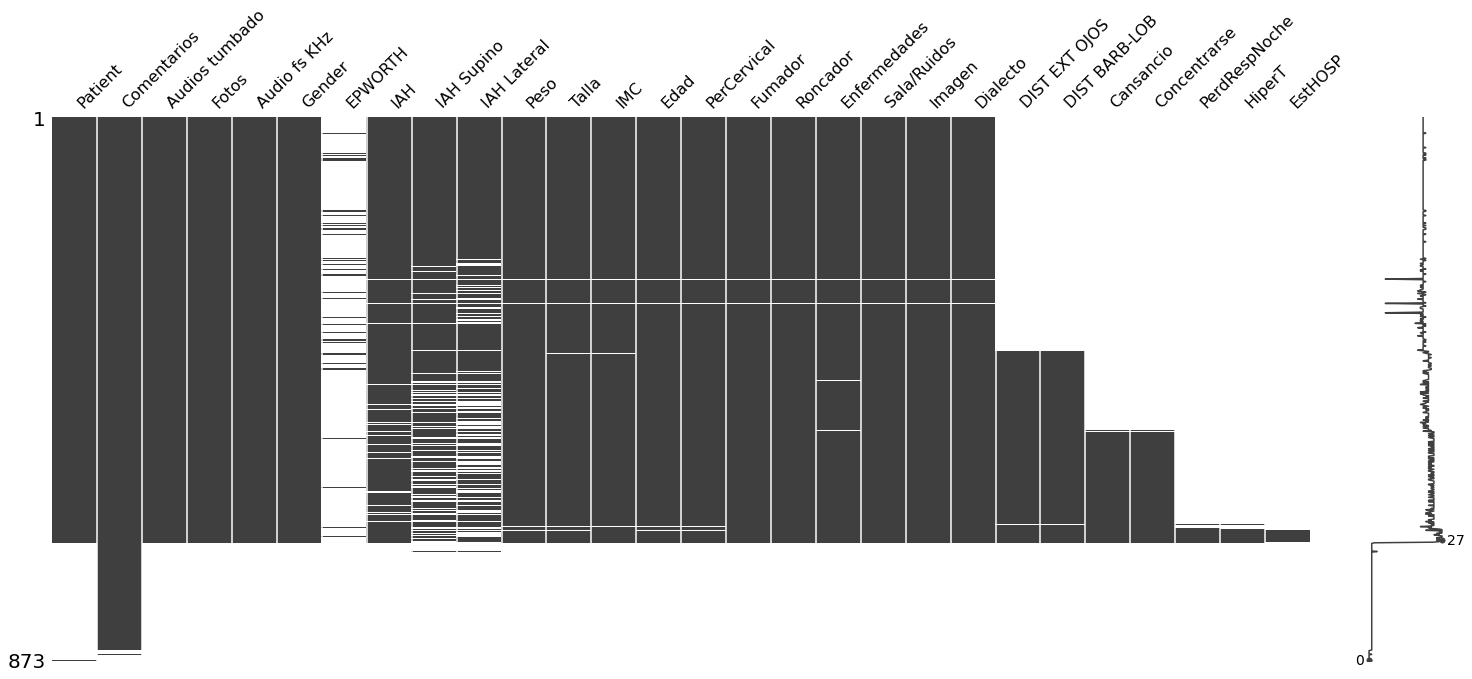

In [6]:
# Visualize NaNs
msno.matrix(df)
plt.show()

In [7]:
CheckList = data.applymap(np.isreal)['Peso']

In [8]:
[i for i, x in enumerate(CheckList) if not x]

[379, 559]

In [9]:
CheckList[378:380]

378     True
379    False
Name: Peso, dtype: bool

In [10]:
data[378:380]['Peso']

378             98
379    no se saben
Name: Peso, dtype: object

In [11]:
data[557:561]['Peso']

557                   94
558                   88
559    No quiere saberlo
560                   75
Name: Peso, dtype: object

# We upload Info_BDApnea_QuironMalaga_rev1.xlsx

In [12]:
data = pd.read_excel("Info_BDApnea_QuironMalaga_rev1.xlsx", sheet_name='Hoja1')

In [13]:
data.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso              float64
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

In [14]:
# We create a data frame with only: Patient, Gender, IAH, Weight, Height, Age, Cervical
OSA_df = data[['Patient','Gender','IAH','Peso','Talla','Edad','PerCervical']]

# We change the colums names
OSA_df.columns = ['Patient','Gender','IAH','Weight','Height','Age','Cervical']

OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
2,P0003,hombre,56.0,-1.0,-1.0,46.0,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


## We use pandas describe() method to see some basic statistics of the data frame

In [15]:
OSA_df.describe()

,IAH,Weight,Height,Age,Cervical
count,649.000000,676.000000,677.000000,678.000000,678.000000
mean,20.364653,87.665680,171.144756,49.280236,40.188053
std,18.692784,18.542861,11.661385,12.851542,5.746654
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.300000,75.000000,165.000000,40.000000,38.000000
50%,14.200000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,199.000000,88.000000,53.000000


In [16]:
# These -1 values are NaNs, so we can mark them as NaN
OSA_df = OSA_df.replace(-1.0,np.NaN)

In [17]:
OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0001,hombre,71.0,82.0,168.0,39.0,NaN
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
2,P0003,hombre,56.0,NaN,NaN,46.0,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


## Visualize NaN with missingno library

[A library to visualize NA](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

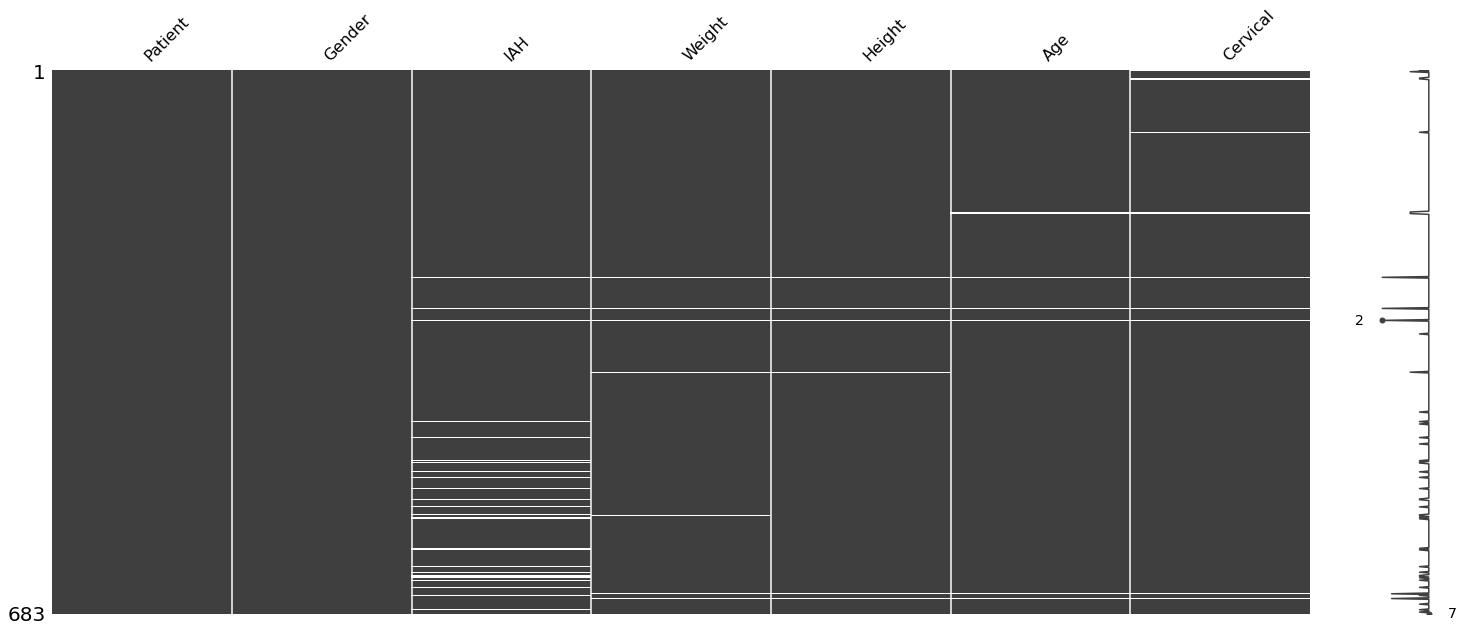

In [18]:
%matplotlib inline

# Visualize missing values as a matrix 
msno.matrix(OSA_df)
plt.show()

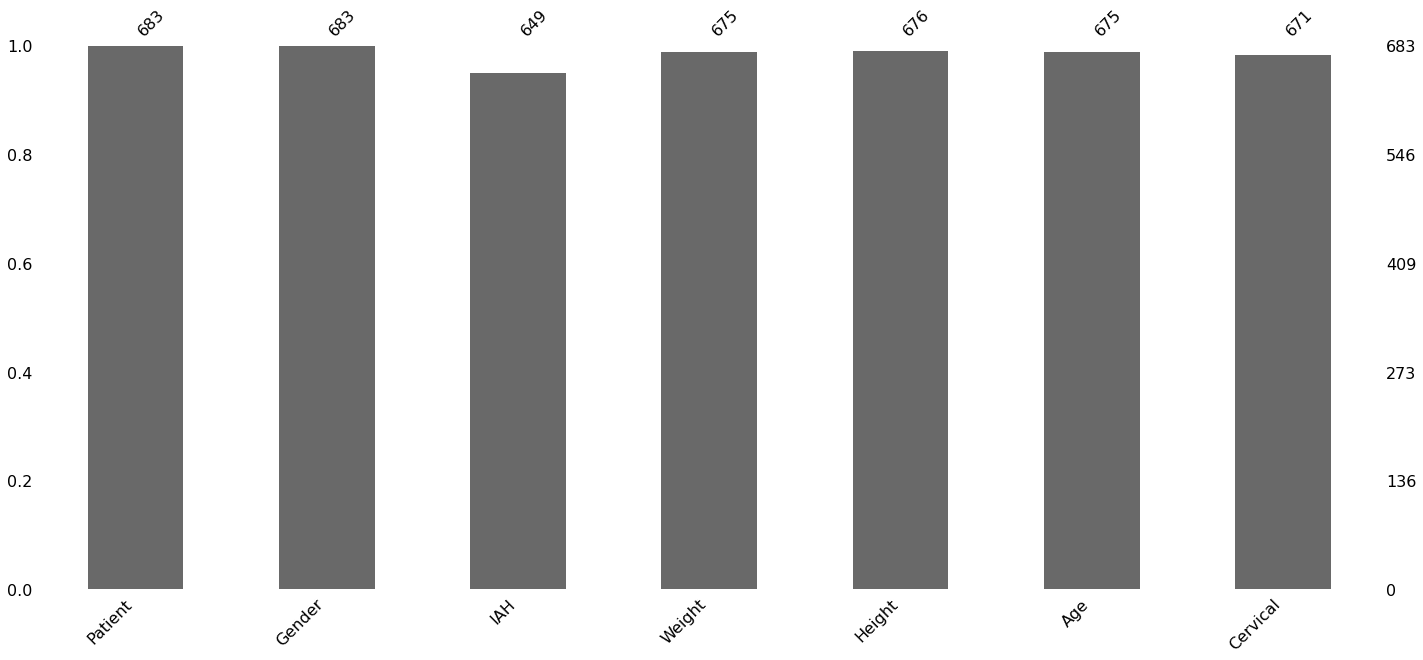

In [19]:
msno.bar(OSA_df)
plt.show()

## We drop NaNs

In [20]:
OSA_df = OSA_df.dropna()
OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0
...,...,...,...,...,...,...,...
676,P0677,mujer,36.3,82.0,165.0,64.0,39.0
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


In [21]:
OSA_df.describe()

,IAH,Weight,Height,Age,Cervical
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,20.392716,87.733124,171.284144,49.497645,40.636578
std,18.596944,18.356730,9.558128,12.386418,3.957542
min,0.000000,45.000000,144.000000,20.000000,30.000000
25%,6.400000,75.000000,165.000000,40.000000,38.000000
50%,14.400000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,197.000000,88.000000,53.000000


## We save the data frame into an Excel: OSA_DB_UPM.xlsx

In [22]:
OSA_df.to_excel('OSA_DB_UPM.xlsx', sheet_name='Hoja1', index = False)